In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print(datetime.datetime.now())

seed 1
2023-07-05 15:14:55.226012


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(-2102.9858)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(6.5677)tensor(8.7612)tensor(5.0440)tensor(6.2001)tensor(4.8525)tensor(2.8925)tensor(4.4708)tensor(4.0194)tensor(6.6541)tensor(4.7270)tensor(4.4851)tensor(3.8731)tensor(9.4664)tensor(4.5292)tensor(6.0902)tensor(3.9541)tensor(6.4076)tensor(2.9261)tensor(6.2490)tensor(3.4594)tensor(3.4435)tensor(4.5053)tensor(8.3107)tensor(5.2121)tensor(4.9610)tensor(5.4772)tensor(10.2395)tensor(9.7950)tensor(3.9959)tensor(4.3558)tensor(5.9251)tensor(4.7797)tensor(3.9167)tensor(4.7079)tensor(7.2478)tensor(3.7173)tensor(6.6862)tensor(3.2366)tensor(4.5697)tensor(4.8188)tensor(3.8432)tensor(2.7721)tensor(3.6013)tensor(3.9829)tensor(3.3105)tensor(3.8830)tensor(6.0174)tensor(3.5978)tensor(6.0705)tensor(3.4714)tensor(4.8124)tensor(4.8761)tensor(2.5154)tensor(4.5802)tensor(7.0990)tensor(3.2062)tensor(4.5406)tensor(2.8313)tensor(8.5555)tensor(5.5226)tensor(7.0887)tensor(4.3625)tensor(3.1099)tensor(7.0318)tensor(4.4554)tensor(5.2382)tensor(6.7950)tensor(6.0327)tensor(3.7336)tensor(6.2505)tensor(6.2174)tenso

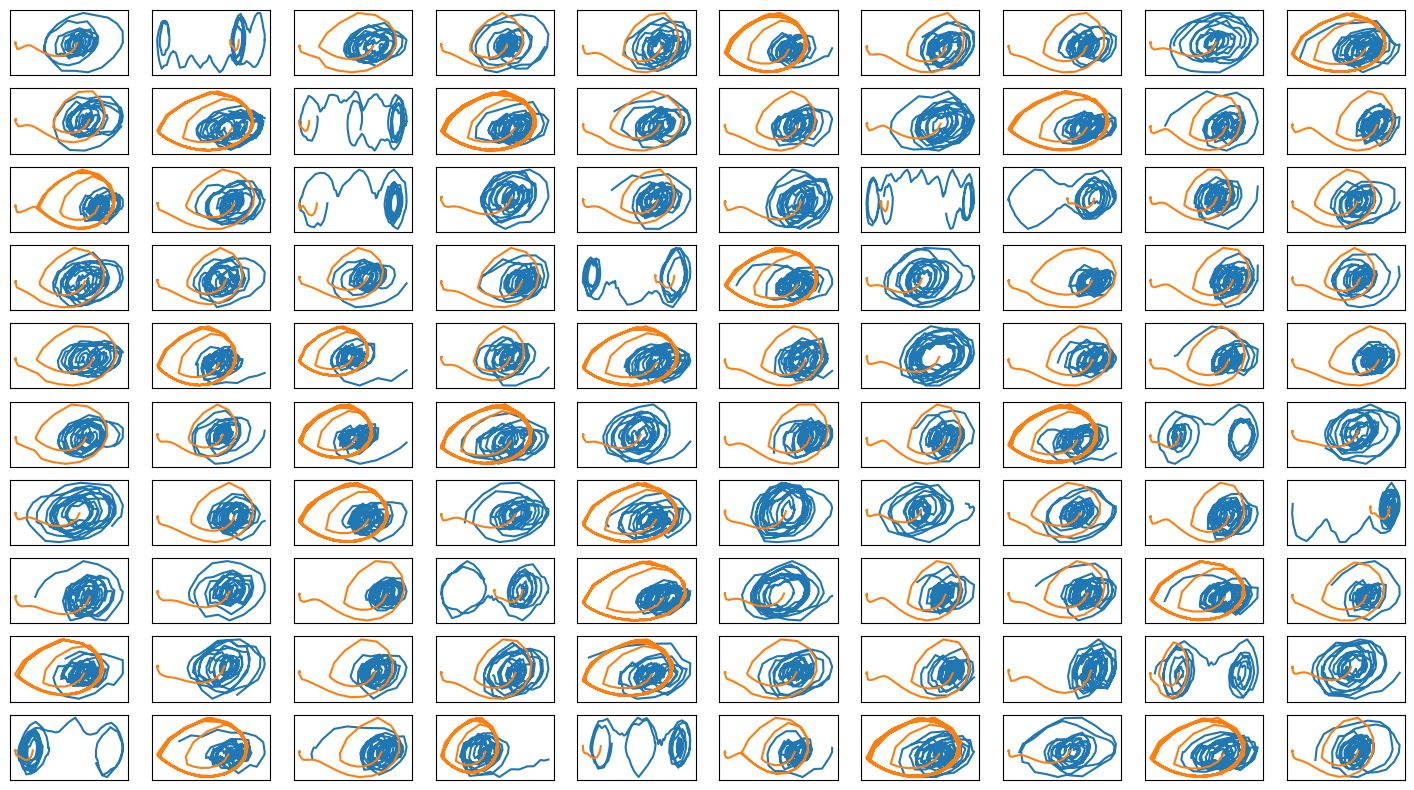

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 480.51920  validloss 594.64007±0.00000  bestvalidloss 594.64007  last_update 0
train: iter 1  trainloss 309.84279  validloss 387.07152±0.00000  bestvalidloss 387.07152  last_update 0
train: iter 2  trainloss 287.01300  validloss 306.37229±0.00000  bestvalidloss 306.37229  last_update 0
train: iter 3  trainloss 358.16261  validloss 809.62785±0.00000  bestvalidloss 306.37229  last_update 1
train: iter 4  trainloss 162.92656  validloss 316.23937±0.00000  bestvalidloss 306.37229  last_update 2
train: iter 5  trainloss 96.86652  validloss 167.05612±0.00000  bestvalidloss 167.05612  last_update 0
train: iter 6  trainloss 66.05735  validloss 176.47890±0.00000  bestvalidloss 167.05612  last_update 1
train: iter 7  trainloss 45.57617  validloss 1208.18566±0.00000  bestvalidloss 167.05612  last_update 2
train: iter 8  trainloss 22.06749  validloss 165.94484±0.00000  bestvalidloss 165.94484  last_update 0
train: iter 9  trainloss 1.28725  validloss 64.0

train: iter 77  trainloss -584.42226  validloss -518.17307±0.00000  bestvalidloss -593.83052  last_update 3
train: iter 78  trainloss -588.94865  validloss -606.54003±0.00000  bestvalidloss -606.54003  last_update 0
train: iter 79  trainloss -569.53457  validloss -571.34417±0.00000  bestvalidloss -606.54003  last_update 1
train: iter 80  trainloss -592.64258  validloss -580.39888±0.00000  bestvalidloss -606.54003  last_update 2
train: iter 81  trainloss -599.85919  validloss -600.94300±0.00000  bestvalidloss -606.54003  last_update 3
train: iter 82  trainloss -594.60397  validloss -496.43031±0.00000  bestvalidloss -606.54003  last_update 4
train: iter 83  trainloss -580.32713  validloss -621.82869±0.00000  bestvalidloss -621.82869  last_update 0
train: iter 84  trainloss -571.40566  validloss -488.88039±0.00000  bestvalidloss -621.82869  last_update 1
train: iter 85  trainloss -611.73618  validloss -556.59966±0.00000  bestvalidloss -621.82869  last_update 2
train: iter 86  trainloss -6

train: iter 153  trainloss -646.09430  validloss -744.96931±0.00000  bestvalidloss -744.96931  last_update 0
train: iter 154  trainloss -640.57052  validloss -670.19406±0.00000  bestvalidloss -744.96931  last_update 1
train: iter 155  trainloss -668.76728  validloss -724.14932±0.00000  bestvalidloss -744.96931  last_update 2
train: iter 156  trainloss -661.27183  validloss -692.06369±0.00000  bestvalidloss -744.96931  last_update 3
train: iter 157  trainloss -689.05327  validloss -667.02353±0.00000  bestvalidloss -744.96931  last_update 4
train: iter 158  trainloss -696.28454  validloss -747.69158±0.00000  bestvalidloss -747.69158  last_update 0
train: iter 159  trainloss -675.70774  validloss -565.02992±0.00000  bestvalidloss -747.69158  last_update 1
train: iter 160  trainloss -680.31042  validloss -727.42648±0.00000  bestvalidloss -747.69158  last_update 2
train: iter 161  trainloss -691.04138  validloss -685.72585±0.00000  bestvalidloss -747.69158  last_update 3
train: iter 162  tr

train: iter 228  trainloss -690.69748  validloss -675.26219±0.00000  bestvalidloss -753.34553  last_update 33
train: iter 229  trainloss -656.48383  validloss -727.67462±0.00000  bestvalidloss -753.34553  last_update 34
train: iter 230  trainloss -695.95450  validloss -337.92577±0.00000  bestvalidloss -753.34553  last_update 35
train: iter 231  trainloss -662.03286  validloss -660.69607±0.00000  bestvalidloss -753.34553  last_update 36
train: iter 232  trainloss -694.97895  validloss -596.52848±0.00000  bestvalidloss -753.34553  last_update 37
train: iter 233  trainloss -685.19813  validloss -619.04786±0.00000  bestvalidloss -753.34553  last_update 38
train: iter 234  trainloss -692.75361  validloss -678.27026±0.00000  bestvalidloss -753.34553  last_update 39
train: iter 235  trainloss -685.90540  validloss -284.55101±0.00000  bestvalidloss -753.34553  last_update 40
train: iter 236  trainloss -692.68955  validloss -737.94755±0.00000  bestvalidloss -753.34553  last_update 41
train: ite

train: iter 303  trainloss -743.89266  validloss -744.65859±0.00000  bestvalidloss -771.04999  last_update 6
train: iter 304  trainloss -745.30999  validloss -746.43739±0.00000  bestvalidloss -771.04999  last_update 7
train: iter 305  trainloss -729.41124  validloss -767.79943±0.00000  bestvalidloss -771.04999  last_update 8
train: iter 306  trainloss -739.72718  validloss -755.73803±0.00000  bestvalidloss -771.04999  last_update 9
train: iter 307  trainloss -742.85507  validloss -760.18439±0.00000  bestvalidloss -771.04999  last_update 10
train: iter 308  trainloss -743.33983  validloss -770.96948±0.00000  bestvalidloss -771.04999  last_update 11
train: iter 309  trainloss -741.83359  validloss -762.31790±0.00000  bestvalidloss -771.04999  last_update 12
train: iter 310  trainloss -751.06041  validloss -753.67639±0.00000  bestvalidloss -771.04999  last_update 13
train: iter 311  trainloss -730.45979  validloss -742.85589±0.00000  bestvalidloss -771.04999  last_update 14
train: iter 31

train: iter 378  trainloss -757.62928  validloss -766.97998±0.00000  bestvalidloss -779.04317  last_update 18
train: iter 379  trainloss -777.61240  validloss -757.67428±0.00000  bestvalidloss -779.04317  last_update 19
train: iter 380  trainloss -762.01217  validloss -782.06692±0.00000  bestvalidloss -782.06692  last_update 0
train: iter 381  trainloss -747.61887  validloss -757.54441±0.00000  bestvalidloss -782.06692  last_update 1
train: iter 382  trainloss -770.64233  validloss -766.11959±0.00000  bestvalidloss -782.06692  last_update 2
train: iter 383  trainloss -769.08840  validloss -778.80818±0.00000  bestvalidloss -782.06692  last_update 3
train: iter 384  trainloss -766.98353  validloss -756.41268±0.00000  bestvalidloss -782.06692  last_update 4
train: iter 385  trainloss -758.58973  validloss -775.93170±0.00000  bestvalidloss -782.06692  last_update 5
train: iter 386  trainloss -738.98858  validloss -748.50996±0.00000  bestvalidloss -782.06692  last_update 6
train: iter 387  

train: iter 453  trainloss -760.60823  validloss -662.04544±0.00000  bestvalidloss -782.06692  last_update 73
train: iter 454  trainloss -779.05442  validloss -733.88899±0.00000  bestvalidloss -782.06692  last_update 74
train: iter 455  trainloss -776.47915  validloss -703.67395±0.00000  bestvalidloss -782.06692  last_update 75
train: iter 456  trainloss -786.22081  validloss -744.62283±0.00000  bestvalidloss -782.06692  last_update 76
train: iter 457  trainloss -776.71522  validloss -721.98269±0.00000  bestvalidloss -782.06692  last_update 77
train: iter 458  trainloss -770.79756  validloss -728.67022±0.00000  bestvalidloss -782.06692  last_update 78
train: iter 459  trainloss -776.70754  validloss -723.25988±0.00000  bestvalidloss -782.06692  last_update 79
train: iter 460  trainloss -778.81383  validloss -727.80695±0.00000  bestvalidloss -782.06692  last_update 80
train: iter 461  trainloss -764.89852  validloss -709.66503±0.00000  bestvalidloss -782.06692  last_update 81
train: ite

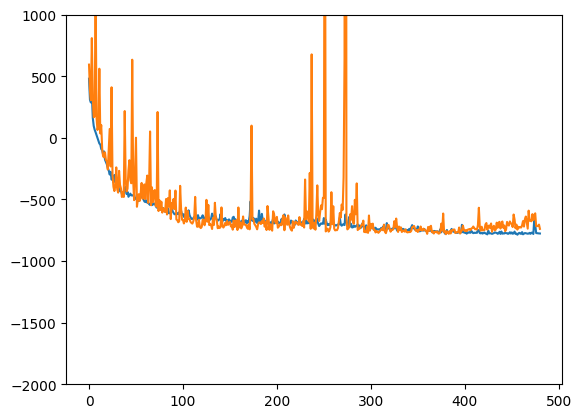

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


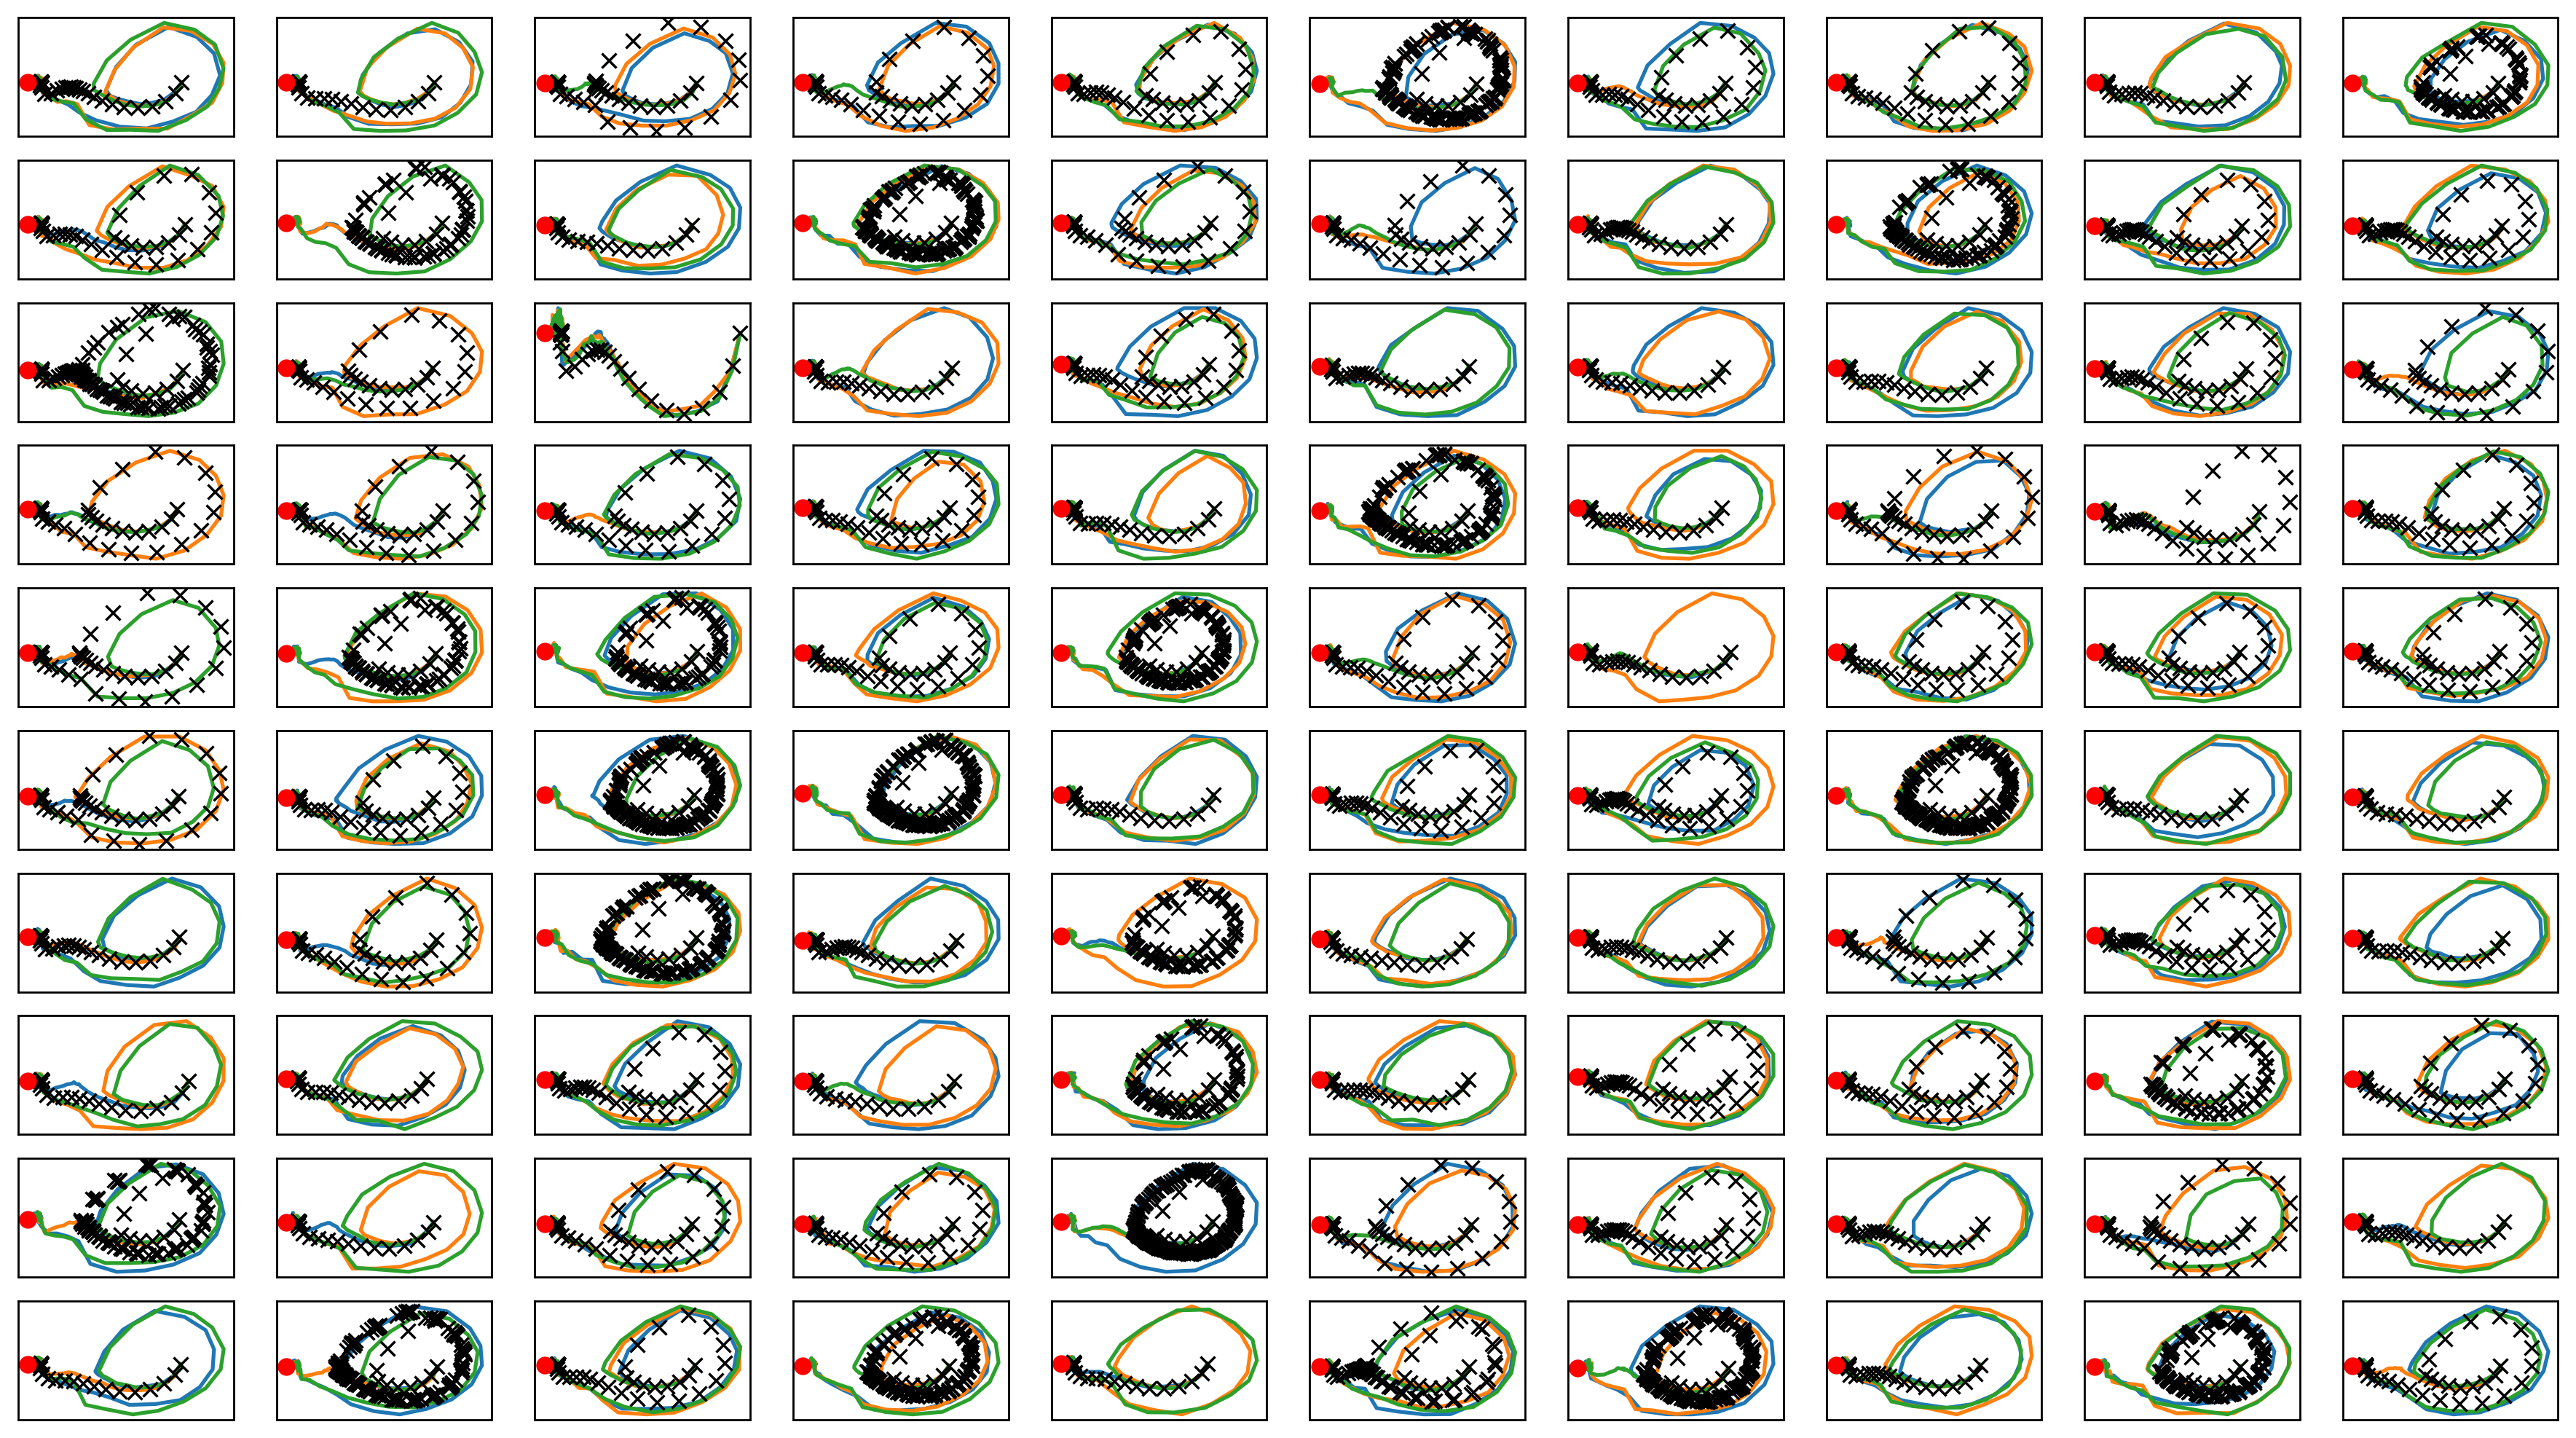

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

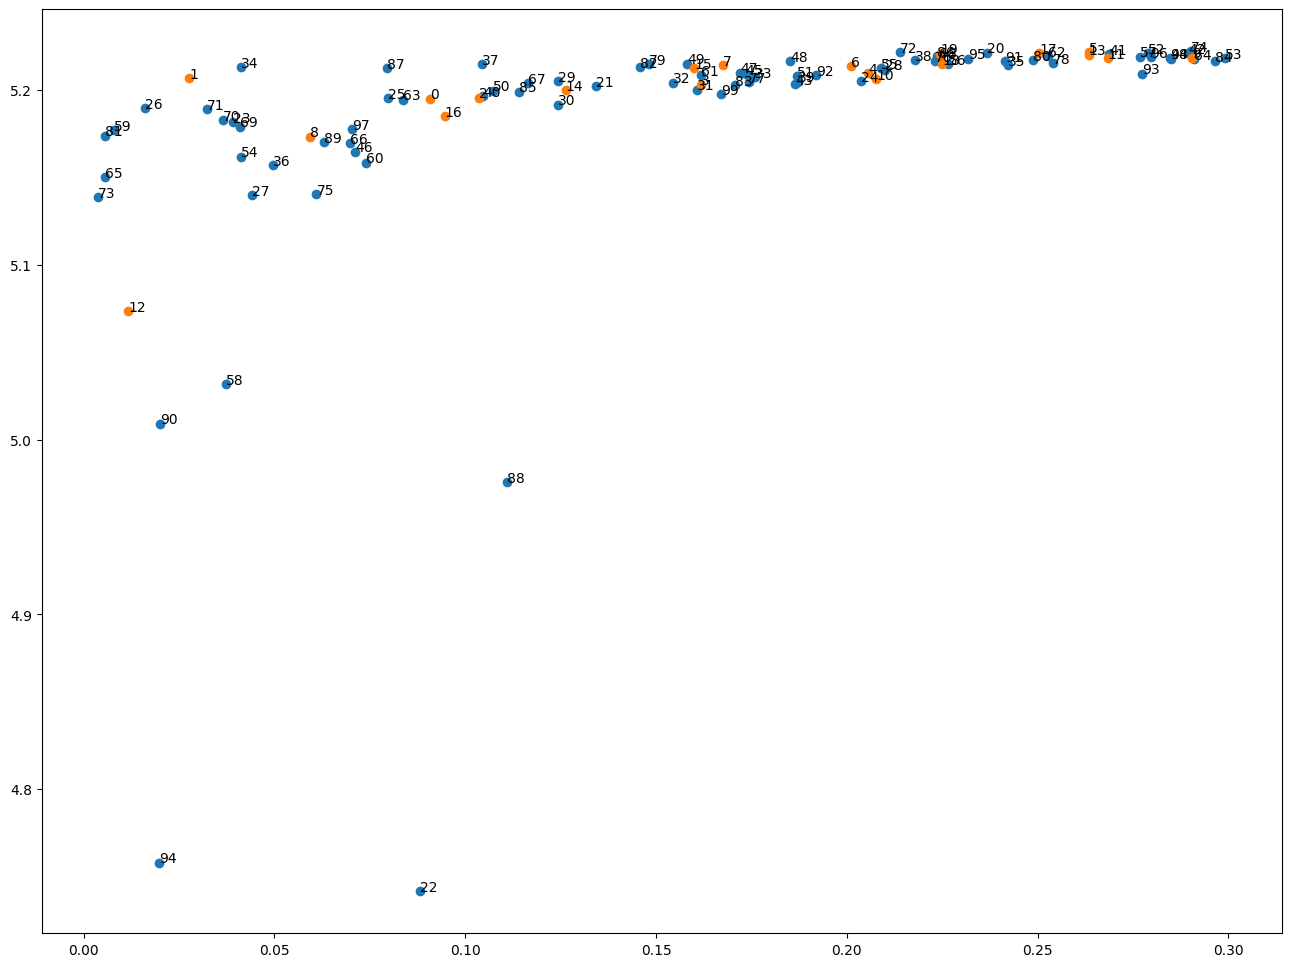

[0.09069977 0.02770158 0.10366822 0.16164502 0.20556585 0.26343523
 0.20114025 0.16760695 0.05943045 0.29047847 0.20769678 0.268382
 0.01171643 0.26344275 0.12633229 0.15994959 0.09465469 0.2503877
 0.22504329 0.2244497  0.2367838  0.13436806 0.08808424 0.03900857
 0.20365066 0.079664   0.01600876 0.04401857 0.20992751 0.1242168
 0.12425378 0.16076892 0.15446673 0.17596651 0.04124241 0.24221739
 0.04960626 0.10432976 0.2177994  0.18710166 0.1046695  0.26876587
 0.28945201 0.18650872 0.28484678 0.17351688 0.07110809 0.17210385
 0.18514347 0.15811743 0.10718093 0.18700803 0.27883117 0.29919686
 0.04114072 0.20904545 0.22663892 0.27690736 0.03728129 0.0078633
 0.07386332 0.16164932 0.25260927 0.0837551  0.29087872 0.00559419
 0.06989228 0.11635819 0.22413649 0.04093657 0.03640304 0.03224824
 0.21389669 0.00376679 0.2901829  0.06098797 0.22314776 0.17440768
 0.25404864 0.14813091 0.24869427 0.00557286 0.14590353 0.17065543
 0.29658485 0.11404235 0.22360033 0.07947587 0.11102526 0.0630522
 

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


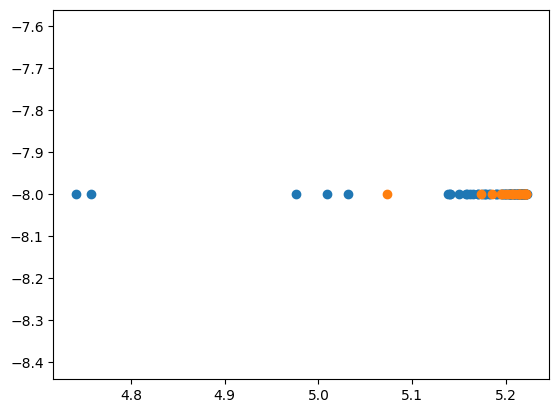

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 13.67504  validloss 14.44744±0.00000  bestvalidloss 14.44744  last_update 0
train: iter 1  trainloss 12.43488  validloss 13.08834±0.00000  bestvalidloss 13.08834  last_update 0
train: iter 2  trainloss 11.35141  validloss 11.94192±0.00000  bestvalidloss 11.94192  last_update 0
train: iter 3  trainloss 10.43256  validloss 10.93220±0.00000  bestvalidloss 10.93220  last_update 0
train: iter 4  trainloss 9.60440  validloss 10.04710±0.00000  bestvalidloss 10.04710  last_update 0
train: iter 5  trainloss 8.91095  validloss 9.28529±0.00000  bestvalidloss 9.28529  last_update 0
train: iter 6  trainloss 8.29795  validloss 8.65456±0.00000  bestvalidloss 8.65456  last_update 0
train: iter 7  trainloss 7.75898  validloss 8.05858±0.00000  bestvalidloss 8.05858  last_update 0
train: iter 8  trainloss 7.27162  validloss 7.55521±0.00000  bestvalidloss 7.55521  last_update 0
train: iter 9  trainloss 6.85762  validloss 7.09087±0.00000  bestvalidloss 7.09087  last_update 0
train:

train: iter 90  trainloss 1.36076  validloss 1.39129±0.00000  bestvalidloss 1.39129  last_update 0
train: iter 91  trainloss 1.30873  validloss 1.33779±0.00000  bestvalidloss 1.33779  last_update 0
train: iter 92  trainloss 1.25878  validloss 1.28795±0.00000  bestvalidloss 1.28795  last_update 0
train: iter 93  trainloss 1.20643  validloss 1.23378±0.00000  bestvalidloss 1.23378  last_update 0
train: iter 94  trainloss 1.15464  validloss 1.18584±0.00000  bestvalidloss 1.18584  last_update 0
train: iter 95  trainloss 1.10284  validloss 1.13070±0.00000  bestvalidloss 1.13070  last_update 0
train: iter 96  trainloss 1.05180  validloss 1.07792±0.00000  bestvalidloss 1.07792  last_update 0
train: iter 97  trainloss 1.00080  validloss 1.02790±0.00000  bestvalidloss 1.02790  last_update 0
train: iter 98  trainloss 0.95159  validloss 0.97563±0.00000  bestvalidloss 0.97563  last_update 0
train: iter 99  trainloss 0.90309  validloss 0.92708±0.00000  bestvalidloss 0.92708  last_update 0
train: ite

train: iter 171  trainloss -0.99281  validloss -1.20254±0.00000  bestvalidloss -1.22508  last_update 1
train: iter 172  trainloss -0.98770  validloss -1.21267±0.00000  bestvalidloss -1.22508  last_update 2
train: iter 173  trainloss -1.00276  validloss -1.24979±0.00000  bestvalidloss -1.24979  last_update 0
train: iter 174  trainloss -1.01782  validloss -1.24094±0.00000  bestvalidloss -1.24979  last_update 1
train: iter 175  trainloss -1.01410  validloss -1.24373±0.00000  bestvalidloss -1.24979  last_update 2
train: iter 176  trainloss -1.02623  validloss -1.26779±0.00000  bestvalidloss -1.26779  last_update 0
train: iter 177  trainloss -1.01224  validloss -1.21234±0.00000  bestvalidloss -1.26779  last_update 1
train: iter 178  trainloss -0.98876  validloss -1.26640±0.00000  bestvalidloss -1.26779  last_update 2
train: iter 179  trainloss -1.02757  validloss -1.24093±0.00000  bestvalidloss -1.26779  last_update 3
train: iter 180  trainloss -1.01516  validloss -1.27541±0.00000  bestvali

train: iter 252  trainloss -1.03862  validloss -1.40267±0.00000  bestvalidloss -1.43248  last_update 15
train: iter 253  trainloss -1.07304  validloss -1.39044±0.00000  bestvalidloss -1.43248  last_update 16
train: iter 254  trainloss -1.04231  validloss -1.41751±0.00000  bestvalidloss -1.43248  last_update 17
train: iter 255  trainloss -1.09890  validloss -1.39699±0.00000  bestvalidloss -1.43248  last_update 18
train: iter 256  trainloss -1.09497  validloss -1.41073±0.00000  bestvalidloss -1.43248  last_update 19
train: iter 257  trainloss -1.09810  validloss -1.40851±0.00000  bestvalidloss -1.43248  last_update 20
train: iter 258  trainloss -1.09480  validloss -1.39818±0.00000  bestvalidloss -1.43248  last_update 21
train: iter 259  trainloss -1.05415  validloss -1.39908±0.00000  bestvalidloss -1.43248  last_update 22
train: iter 260  trainloss -1.05236  validloss -1.42119±0.00000  bestvalidloss -1.43248  last_update 23
train: iter 261  trainloss -1.09505  validloss -1.42147±0.00000 

train: iter 332  trainloss -1.07526  validloss -1.42292±0.00000  bestvalidloss -1.47552  last_update 48
train: iter 333  trainloss -1.08929  validloss -1.40339±0.00000  bestvalidloss -1.47552  last_update 49
train: iter 334  trainloss -1.03656  validloss -1.44567±0.00000  bestvalidloss -1.47552  last_update 50
train: iter 335  trainloss -1.04305  validloss -1.45550±0.00000  bestvalidloss -1.47552  last_update 51
train: iter 336  trainloss -1.08366  validloss -1.44253±0.00000  bestvalidloss -1.47552  last_update 52
train: iter 337  trainloss -1.06053  validloss -1.43856±0.00000  bestvalidloss -1.47552  last_update 53
train: iter 338  trainloss -1.08054  validloss -1.39203±0.00000  bestvalidloss -1.47552  last_update 54
train: iter 339  trainloss -1.10886  validloss -1.37651±0.00000  bestvalidloss -1.47552  last_update 55
train: iter 340  trainloss -1.03245  validloss -1.43729±0.00000  bestvalidloss -1.47552  last_update 56
train: iter 341  trainloss -1.08828  validloss -1.42161±0.00000 

train: iter 414  trainloss -1.03240  validloss -1.43111±0.00000  bestvalidloss -1.48361  last_update 7
train: iter 415  trainloss -1.05606  validloss -1.39439±0.00000  bestvalidloss -1.48361  last_update 8
train: iter 416  trainloss -1.08955  validloss -1.45071±0.00000  bestvalidloss -1.48361  last_update 9
train: iter 417  trainloss -1.08100  validloss -1.43090±0.00000  bestvalidloss -1.48361  last_update 10
train: iter 418  trainloss -1.04836  validloss -1.46183±0.00000  bestvalidloss -1.48361  last_update 11
train: iter 419  trainloss -1.08367  validloss -1.44276±0.00000  bestvalidloss -1.48361  last_update 12
train: iter 420  trainloss -1.03861  validloss -1.41018±0.00000  bestvalidloss -1.48361  last_update 13
train: iter 421  trainloss -1.09318  validloss -1.47692±0.00000  bestvalidloss -1.48361  last_update 14
train: iter 422  trainloss -1.04831  validloss -1.41806±0.00000  bestvalidloss -1.48361  last_update 15
train: iter 423  trainloss -1.03756  validloss -1.42887±0.00000  be

train: iter 495  trainloss -1.05720  validloss -1.46217±0.00000  bestvalidloss -1.49850  last_update 48
train: iter 496  trainloss -1.11355  validloss -1.44459±0.00000  bestvalidloss -1.49850  last_update 49
train: iter 497  trainloss -1.09174  validloss -1.44384±0.00000  bestvalidloss -1.49850  last_update 50
train: iter 498  trainloss -1.04476  validloss -1.41986±0.00000  bestvalidloss -1.49850  last_update 51
train: iter 499  trainloss -1.04757  validloss -1.41149±0.00000  bestvalidloss -1.49850  last_update 52
train: iter 500  trainloss -1.07166  validloss -1.45988±0.00000  bestvalidloss -1.49850  last_update 53
train: iter 501  trainloss -1.07933  validloss -1.46069±0.00000  bestvalidloss -1.49850  last_update 54
train: iter 502  trainloss -1.05511  validloss -1.43661±0.00000  bestvalidloss -1.49850  last_update 55
train: iter 503  trainloss -1.04359  validloss -1.42917±0.00000  bestvalidloss -1.49850  last_update 56
train: iter 504  trainloss -1.03906  validloss -1.45102±0.00000 

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([ 5.1831, -4.9571], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 12.84089  validloss 20.44550±0.00000  bestvalidloss 20.44550  last_update 0
train: iter 1  trainloss 5.94442  validloss 11.13317±0.00000  bestvalidloss 11.13317  last_update 0
train: iter 2  trainloss 3.46303  validloss 6.73270±0.00000  bestvalidloss 6.73270  last_update 0
train: iter 3  trainloss 2.73452  validloss 5.42088±0.00000  bestvalidloss 5.42088  last_update 0
train: iter 4  trainloss 2.46572  validloss 4.92682±0.00000  bestvalidloss 4.92682  last_update 0
train: iter 5  trainloss 2.35858  validloss 4.72441±0.00000  bestvalidloss 4.72441  last_update 0
train: iter 6  trainloss 2.25554  validloss 4.60241±0.00000  bestvalidloss 4.60241  last_update 0
train: iter 7  trainloss 2.22781  validloss 4.44326±0.00000  bestvalidloss 4.44326  last_update 0
train: iter 8  trainloss 2.22660  validloss 4.40039±0.00000  bestvalidloss 4.40039  last_update 0
train: iter 9  trainloss 2.19028  validloss 4.46441±0.00000  bestvalidloss 4.40039  last_update 1
train: iter 10 

train: iter 83  trainloss 1.88419  validloss 3.60446±0.00000  bestvalidloss 3.55829  last_update 8
train: iter 84  trainloss 1.89721  validloss 3.56420±0.00000  bestvalidloss 3.55829  last_update 9
train: iter 85  trainloss 1.92083  validloss 3.65892±0.00000  bestvalidloss 3.55829  last_update 10
train: iter 86  trainloss 1.89349  validloss 3.59032±0.00000  bestvalidloss 3.55829  last_update 11
train: iter 87  trainloss 1.88463  validloss 3.64168±0.00000  bestvalidloss 3.55829  last_update 12
train: iter 88  trainloss 1.88571  validloss 3.68293±0.00000  bestvalidloss 3.55829  last_update 13
train: iter 89  trainloss 1.91202  validloss 3.71042±0.00000  bestvalidloss 3.55829  last_update 14
train: iter 90  trainloss 1.88921  validloss 3.59212±0.00000  bestvalidloss 3.55829  last_update 15
train: iter 91  trainloss 1.87963  validloss 3.59993±0.00000  bestvalidloss 3.55829  last_update 16
train: iter 92  trainloss 1.89750  validloss 3.57774±0.00000  bestvalidloss 3.55829  last_update 17
tr

train: iter 165  trainloss 1.88225  validloss 3.64397±0.00000  bestvalidloss 3.52051  last_update 33
train: iter 166  trainloss 1.90123  validloss 3.67364±0.00000  bestvalidloss 3.52051  last_update 34
train: iter 167  trainloss 1.88768  validloss 3.70014±0.00000  bestvalidloss 3.52051  last_update 35
train: iter 168  trainloss 1.87937  validloss 3.58390±0.00000  bestvalidloss 3.52051  last_update 36
train: iter 169  trainloss 1.90165  validloss 3.68522±0.00000  bestvalidloss 3.52051  last_update 37
train: iter 170  trainloss 1.88824  validloss 3.63486±0.00000  bestvalidloss 3.52051  last_update 38
train: iter 171  trainloss 1.87539  validloss 3.56242±0.00000  bestvalidloss 3.52051  last_update 39
train: iter 172  trainloss 1.87029  validloss 3.57063±0.00000  bestvalidloss 3.52051  last_update 40
train: iter 173  trainloss 1.90621  validloss 3.65606±0.00000  bestvalidloss 3.52051  last_update 41
train: iter 174  trainloss 1.87137  validloss 3.66529±0.00000  bestvalidloss 3.52051  last_

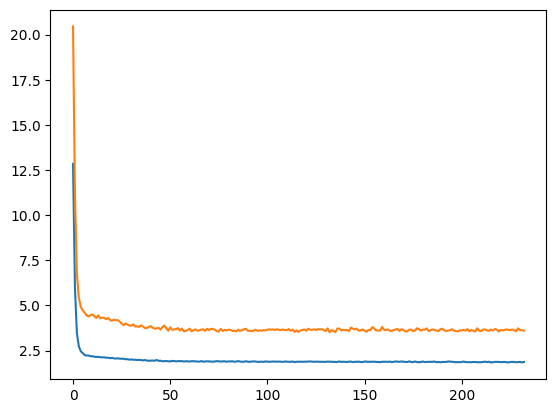

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(0.2260)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-0.9595)


In [21]:
print(vi.h_min_tilde)

-5.8547387


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.07225109963942894
tensor([-0.5049])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

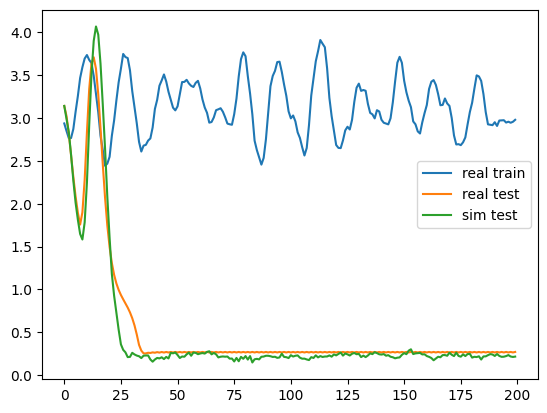

encoder [ 5.2209067 -8.       ]
initial_belief tensor([ 5.1831, -4.9571])
real train tensor([ 5.2256, -8.0054])
real test tensor([ 5.2337, -8.0165])
sim tensor([ 5.2558, -8.0021])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.0


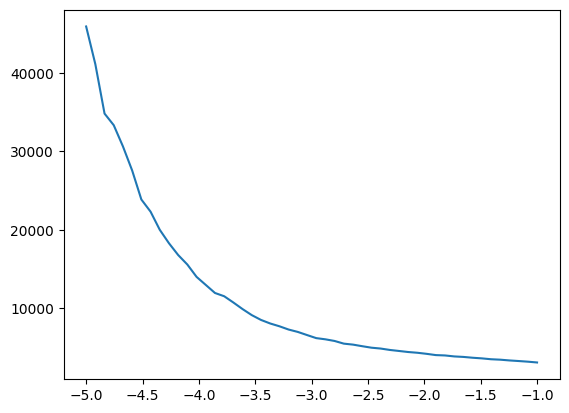

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.1333755976468225
tensor([1.8478])
